# Market segmentation example

In this notebook we explore a bit more sophisticated example of clustering

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [3]:
# Load the data
data = pd.read_csv('3.12. Example.csv')

data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


**NOTE:** You can see that 'Loyalty' is already standardized

## Plot the data

Create a preliminary plot to see if you can spot something

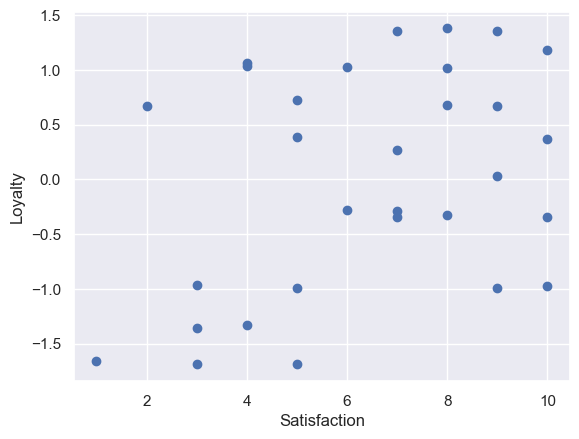

In [5]:
#scatter plot
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Select the features

In [6]:
# Select both features by creating a copy of the data variable
#this good for general purposes, so you can have the original data
x = data.copy()

## Clustering

In [8]:
#Create kmeans object
#The number in the brackets is K, or the number of clusters we are aiming for. 
kmeans = KMeans(2)

#fit the data aka our selected features, which in this case is the entire dataset (satisfaction,loyalty)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [11]:
# Create a copy of the input data
clusters = x.copy()

# now we are adding a new column called the predicted clusters into the clusters dataset
clusters['cluster_pred'] = kmeans.fit_predict(x)

clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


**NOTE:** Again, here I only have 2 clusters because I defined the clustering to be 2!!


Now that we 1. Defined the clustering 2. Did the actual clustering --> we can now plot the "new results" on a graph

**When we add, c=clusters['cluster_pred'] --> we are saying to the program that our dataset is essentially grouped into different pairs and that pairs is defined by the column c=clusters['cluster_pred']**

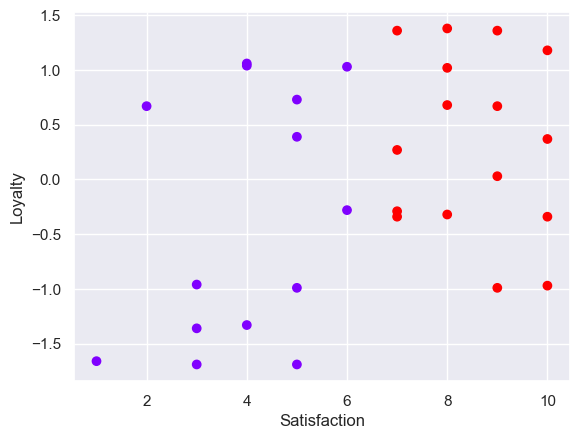

In [12]:
#plt scatter
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c= clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

**RESULT**

We see our two clusters and a cutoff line of Satisfaction at 6. Everything on the right is one cluster, and the left is the other. ----> Most likely, the algorthim ONLY considered satisfaction as a feature. **WHY??** Because we did not standardize the variable, so the weight is not balanced as the values for Satisfaction is much higher than Loyalty. As a result,K-means more or less disregarded Loyalty as a feature. Whenever you cluster on the basis of a single feature the result looks like the graph is cut by a vertical line. Good way to spot if something is wrong

## Standardize the variables

Let's standardize and check the new result

In [13]:
# Import preprocessing
from sklearn import preprocessing

# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

**NOTE:** we get an array of the x column standardized, and the same values for loyalty. 

## Take advantage of the Elbow method

Since we don't know the right number of clusters actually needed, we do the Elbow Method. 

In [15]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.54983679159933,
 5.326631124753925,
 4.315662464700004,
 3.7731154678851966]

**EXPLANATION ON IT WORKS**

1. We are stating for the loop to iterarw 9 times
2. In the first loop, we are creating a kmeans objects stating that we want only ONE cluster
3. In kmeans.fit(x_scaled), we are saying that we want our standardized dataset (x_scaled) to be fitted in ONE cluster
4. In wcss.append(kmeans.inertia_), we are basically saying to the program to decide how WELL our standardized dataset was fitted to ONE cluster. 
5. We get 60.0
6. Program loops to the next number, number 2. 

Text(0, 0.5, 'WCSS')

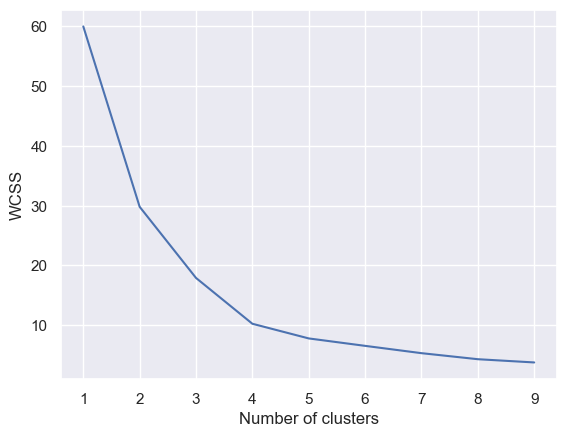

In [16]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [17]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [18]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


**IMPORTANT**

Here, the dataframe contains the original values but the predicted column 'cluster_pred' is based on the solution using the standardized data. --> We will plot the data without standardsing the AXES, but the solution will be the standardized one. 

Text(0, 0.5, 'Loyalty')

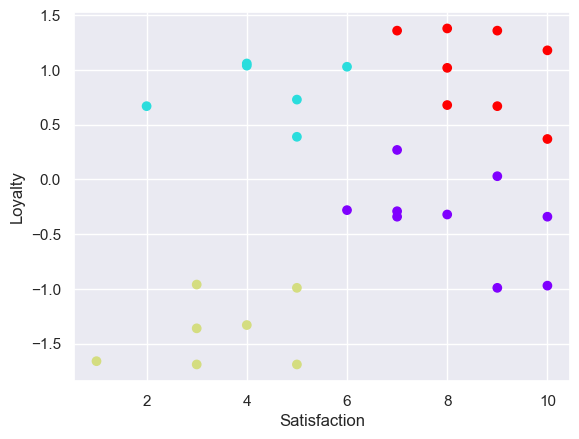

In [20]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

By keeping the original x-axis, we get an intuition for HOW SATISFIED WERE THE CUSTOMERS